## Calculation of Confidence Intervals for Different Future Periods
<div style="text-align: justify">
The main purpose of this project is to demonstrate a useful way confidence intervals can be effectively utilized for enhacing a company's inventory management for specific future periods. Confidence intervals are applied to the same dataset for three different future periods and the results are compared with each other. Visualizations are provided to better highlight the differences.

## Environment Management
Project Directory Name: conf_intervals_prj  
Project Environment Name: Conf_Intervals

<div style="text-align: justify">
Running the cell below should indicate the jupyter's environment. The environment should be the same with the project's environment name, i.e., "Conf_Intervals".

In [ ]:
import sys
sys.executable

## Project Libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [3]:
filepath = "al_bundys_dataset.xlsx"
sheetname = "Al Bundy"
# Read specific sheet from the Excel file and skip the first 3 rows:
df = pd.read_excel(filepath, sheet_name=sheetname, skiprows=3)
df.head()

,Unnamed: 0,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 12,Month,SalePrice
0,NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,NaN,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,NaN,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,NaN,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


## Data Cleaning

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     0 non-null      float64       
 1   InvoiceNo      14967 non-null  int64         
 2   Date           14967 non-null  datetime64[ns]
 3   Country        14967 non-null  object        
 4   ProductID      14967 non-null  int64         
 5   Shop           14967 non-null  object        
 6   Gender         14967 non-null  object        
 7   Size (US)      14967 non-null  float64       
 8   Size (Europe)  14967 non-null  object        
 9   Size (UK)      14967 non-null  float64       
 10  UnitPrice      14967 non-null  int64         
 11  Discount       14967 non-null  float64       
 12  Unnamed: 12    14967 non-null  int64         
 13  Month          14967 non-null  int64         
 14  SalePrice      14967 non-null  float64       
dtypes: datetime64[ns](1

,Unnamed: 0,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 12,Month,SalePrice
0,NaN,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,NaN,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,NaN,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,NaN,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,NaN,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [5]:
# Delete the unecessary columns:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 12", "Month", "Size (US)", "Size (UK)"])

# Truncate the datetime to the nearest day, time is unecessary:
df["Date"] = df["Date"].dt.floor("D")

In [6]:
# Define a function which converts the shoe sizes to single decimal values:
def convert_to_decimal(size):
    # Make sure the if statement will work treating the input as a strings:
    size = str(size)
    # Check if the size is a range, instead of a single numerical value:
    if "-" in size:
        # Split this range into low and high values:
        low, high = size.split("-")
        # Return a single decimal value adding 0.5 at the low value:
        return float(int(low) + 0.5)
    else:
        # If not a range, covert the size to a float and return it:
        return float(size)

# Apply the above function to the "Size (Europe)" column:
df["Size (Europe)"] = df["Size (Europe)"].apply(convert_to_decimal)

In [7]:
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (Europe),UnitPrice,Discount,SalePrice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,44.0,159,0.0,159.0
1,52390,2014-01-01,United States,2230,US15,Male,44.5,199,0.2,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,42.5,149,0.2,119.2
3,52392,2014-01-01,United States,2234,US6,Female,40.0,159,0.0,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,39.5,159,0.0,159.0


This is the final, cleaned df.

## Descriptive Statistics

In [8]:
# Group by "Gender" keeping specific columns:
gender_group_df = df.groupby("Gender")[["Date", "Size (Europe)", "UnitPrice", "Discount", "SalePrice"]]

# Create a male df:
df_male = gender_group_df.get_group("Male")

# Create a female df:
df_female = gender_group_df.get_group("Female")

# Apply describe method to the grouped dfs:
summary_stats = gender_group_df.describe().transpose()

summary_stats

Gender                                      Female  \
Date          count                           6048   
              mean   2015-10-25 02:02:51.428571392   
              min              2014-01-01 00:00:00   
              25%              2015-03-31 18:00:00   
              50%              2015-12-22 00:00:00   
              75%              2016-07-01 06:00:00   
              max              2016-12-31 00:00:00   
              std                              NaN   
Size (Europe) count                         6048.0   
              mean                       38.826389   
              min                             35.0   
              25%                             38.0   
              50%                             39.0   
              75%                             39.5   
              max                             42.5   
              std                         1.219719   
UnitPrice     count                         6048.0   
              mean                      164.431548   
              min                            129.0   
              25%                            149.0   
              50%                            169.0   
              75%                            189.0   
              max                            199.0   
              std                        22.863019   
Discount      count                         6048.0   
              mean                         0.12376   
              min                              0.0   
              25%                              0.0   
              50%                              0.0   
              75%                              0.2   
              max                              0.5   
              std                         0.170028   
SalePrice     count                         6048.0   
              mean                      144.209077   
              min                             64.5   
              25%                            125.1   
              50%                            149.0   
              75%                            169.0   
              max                            199.0   
              std                        34.967275   

Gender                                        Male  
Date          count                           8919  
              mean   2015-10-29 19:24:33.662966784  
              min              2014-01-01 00:00:00  
              25%              2015-04-08 00:00:00  
              50%              2015-12-22 00:00:00  
              75%              2016-07-05 00:00:00  
              max              2016-12-31 00:00:00  
              std                              NaN  
Size (Europe) count                         8919.0  
              mean                        42.78002  
              min                             39.0  
              25%                             42.0  
              50%                             42.5  
              75%                             43.5  
              max                             48.0  
              std                         1.414963  
UnitPrice     count                         8919.0  
              mean                      163.994955  
              min                            129.0  
              25%                            139.0  
              50%                            159.0  
              75%                            179.0  
              max                            199.0  
              std                        22.992571  
Discount      count                         8919.0  
              mean                        0.124184  
              min                              0.0  
              25%                              0.0  
              50%                              0.0  
              75%                              0.2  
              max                              0.5  
              std                         0.170179  
SalePrice     count                 

In [9]:
# See the correlations between the columns:
gender_group_df.corr()

Date  Size (Europe)  UnitPrice  Discount  SalePrice
Gender                                                                       
Female Date           1.000000      -0.009191  -0.006220  0.020354  -0.019191
       Size (Europe) -0.009191       1.000000  -0.014925 -0.003550  -0.001578
       UnitPrice     -0.006220      -0.014925   1.000000 -0.032821   0.595032
       Discount       0.020354      -0.003550  -0.032821  1.000000  -0.814698
       SalePrice     -0.019191      -0.001578   0.595032 -0.814698   1.000000
Male   Date           1.000000      -0.026272  -0.024135  0.000902  -0.013298
       Size (Europe) -0.026272       1.000000  -0.021179 -0.019395   0.001628
       UnitPrice     -0.024135      -0.021179   1.000000 -0.053315   0.612697
       Discount       0.000902      -0.019395  -0.053315  1.000000  -0.814374
       SalePrice     -0.013298       0.001628   0.612697 -0.814374   1.000000

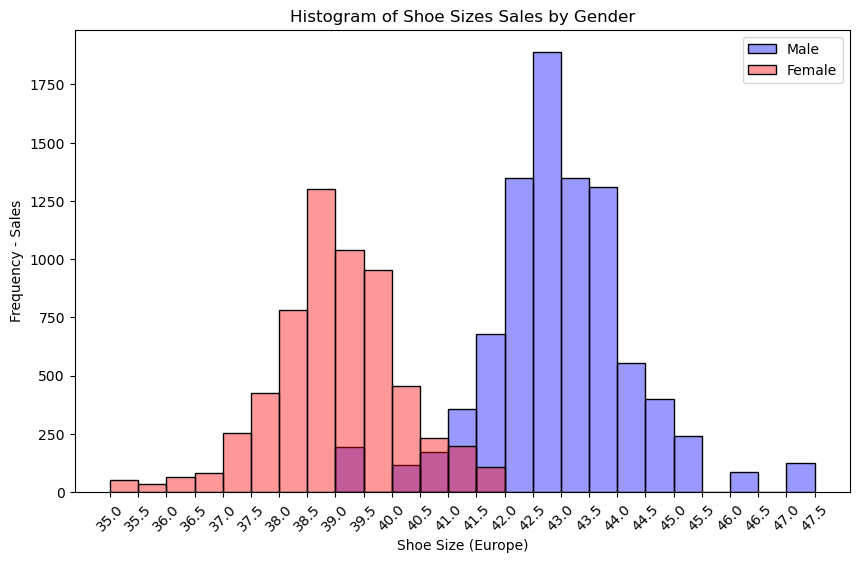

In [10]:
# Ignore the warnings:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Create a figure:
plt.figure(figsize=(10, 6))

# Create histograms for shoe sizes for males and females:
sns.histplot(
    data=df_male, 
    x="Size (Europe)", 
    alpha=0.4, 
    bins=np.arange(39, 48, 0.5), 
    color="blue", 
    label="Male"
)
sns.histplot(
    data=df_female, 
    x="Size (Europe)", 
    alpha=0.4, 
    bins=np.arange(35, 42.5, 0.5), 
    color="red", 
    label="Female"
)

# Set the title and labels:
plt.title("Histogram of Shoe Sizes Sales by Gender")
plt.xlabel("Shoe Size (Europe)")
plt.ylabel("Frequency - Sales")

# Set x-axis to indicate the actual intervals: 
plt.xticks(np.arange(35, 48, 0.5), rotation=45)

# Show the legend:
plt.legend();

<div style="text-align: justify">
Based on the above histograms, we can assume normality. This provides a good starting point for proceeding to the next part, which concerns the creation of confidence intervals. 

## Inferential Statistics  
<div style="text-align: justify">
This section addresses the main goal of the project. Let's discuss about the dataset ensuring we can make accurate predictions. 

<div style="text-align: justify">
The dataset includes 3 years of sales data. This is the sample size for the future predictions. This sample dictates the maximum future period we can forecast, that is, 3 years. However, aiming for a 3-year sale prediction, without multiple 3-year samples is pointless. It's more logical to predict the sales for shorter future periods, such as, 1 year, 3 months and 1 month. These approaches have different sample sizes with $n=3$, $n=12$ and $n=36$ respectively. 

<div style="text-align: justify">
Since the dataset spans 3-year sales, this is a large sample (Al Bundy's operates for more than 30 years) which allows for the application of the Central Limit Theorem. Consequently, we can assume normality in the data and proceed with the confidence intervals calculations.

### Data Preprocessing before the Application of Confidence Intervals

In [11]:
# Create three copies of the original df, one copy for each approach for males:
df_year_male = df_male.copy()
df_quarter_male = df_male.copy()
df_month_male = df_male.copy()

# Adapt the datetimes to each approach:
# 1-year adaption
df_year_male["Date (year)"] = df_year_male["Date"].dt.year

# Delete the old date column:
df_year_male = df_year_male.drop(columns="Date")

# 3-month adaption
df_quarter_male["Quarter"] = (
    df_quarter_male["Date"].dt.quarter
)  # Keep the quarter of each datetime to a new column.
df_quarter_male["Year"] = (
    df_quarter_male["Date"].dt.year
)  # Keep the year of each datetime to a new column.

# Concatenate the quarter with the year columns:
df_quarter_male["Date (quarter)"] = (
    df_quarter_male["Quarter"].astype(str) + "-" + df_quarter_male["Year"].astype(str)
)

# Delete the rest of the columns:
df_quarter_male = df_quarter_male.drop(columns=["Quarter", "Year", "Date"])

# 1-month adaption
df_month_male["Month"] = (
    df_month_male["Date"].dt.month
)  # Keep the month of each datetime to a new column.
df_month_male["Year"] = (
    df_month_male["Date"].dt.year
)  # Keep the year of each datetime to a new column.

# Concatenate the month with the year columns:
df_month_male["Date (month)"] = (
    df_month_male["Month"].astype(str) + "-" + df_month_male["Year"].astype(str)
)

# Delete the rest of the columns:
df_month_male = df_month_male.drop(columns=["Month", "Year", "Date"])

We wont repeat the same process for women's population because the results will be similar.

### Confidence Intervals for 1-year Sales Prediction for Males

##### Key Considerations
There is one population with an unknown variance and normality can be assumed.

##### Calculation of Mean and Standard Deviation per Shoe Size Combining all Years

In [12]:
# Create a df from the shoe size value_counts series:
male_sales_per_year = (
    df_year_male.groupby(["Date (year)", "Size (Europe)"]).size().reset_index(name="Sales")
)

# Calculate the mean and the std per shoe size combining all three years:
combined_sales_per_year = (
    male_sales_per_year.groupby("Size (Europe)")["Sales"].agg(["mean", "std"]).reset_index()
)

# Set a clearer column names:
combined_sales_per_year.columns = ["Size (Europe)", "Sales Mean", "Sales Standard Deviation"]

In [13]:
# Assign some columns in variables, gaining space afterwards:
sizes = combined_sales_per_year["Size (Europe)"]
means = combined_sales_per_year["Sales Mean"]
std = combined_sales_per_year["Sales Standard Deviation"]

##### Calculation of Standard Error for each Shoe Size
<div style="text-align: justify">
This is the formula for the standard error of the mean:
$$SE_\bar{x}=\frac{s}{\sqrt{n}}$$
Where, $s$ is the sample standard deviation and $n$ is the sample size. The sample size, $n$ is 3, then the degrees of freedom, $df$ is 2.

In [14]:
# Assign the sample size, n value to a variable:
n = 3

# Add a new column containing sample size, n, per shoe size:
combined_sales_per_year["n"] = n

# Add a new column calculating the standard error, SE, per shoe size:
combined_sales_per_year["Standard Error"] = std / (combined_sales_per_year["n"]**0.5)

print(combined_sales_per_year)

    Size (Europe)  Sales Mean  Sales Standard Deviation  n  Standard Error
0            39.0        65.0                 36.055513  3       20.816660
1            40.0        38.0                 22.605309  3       13.051181
2            40.5        57.0                 34.394767  3       19.857828
3            41.0       118.0                 57.297469  3       33.080709
4            41.5       226.0                130.984732  3       75.624070
5            42.0       449.0                212.028300  3      122.414596
6            42.5       630.0                275.228996  3      158.903535
7            43.0       449.0                216.778689  3      125.157234
8            43.5       436.0                177.265338  3      102.344191
9            44.0       184.0                 88.017044  3       50.816664
10           44.5       133.0                 61.506097  3       35.510562
11           45.0        80.0                 39.038443  3       22.538855
12           46.0        

In [15]:
# Assign some columns in variables, gaining space afterwards:
st_error = combined_sales_per_year["Standard Error"]

##### Calculation of t-statistic
<div style="text-align: justify">
Assuming we want to be 95%  confident the next year's sales per shoe size will fall inside our confident interval range, the confident level is $1-α=0.95$, and hence $α=0.05$. The degrees of freedom, $n-1$ equals $3-1=2$, $df=2$. Therefore, we are looking for $t_{2, 0.025}$. From t-distribution table critical values table we can see that $t_{2, 0.025}=4.303$.

In [16]:
# Assign the t-statistic value to a variable:
t_statistic = 4.303

# Create a new column with the margin of error:
combined_sales_per_year["Margin of Error"] = t_statistic * st_error

In [17]:
# Assign some columns in variables, gaining space afterwards:
mrg_error = combined_sales_per_year["Margin of Error"]

##### Calculation of Confidence Intervals

In [18]:
# Create a new column containing the lower confidence interval for each shoe size:
combined_sales_per_year["Lower CI"] = means - mrg_error

# Create a new column containing the upper confidence interval for each shoe size:
combined_sales_per_year["Upper CI"] = means + mrg_error

combined_sales_per_year

,Size (Europe),Sales Mean,Sales Standard Deviation,n,Standard Error,Margin of Error,Lower CI,Upper CI
0,39.0,65.0,36.055513,3,20.816660,89.574088,-24.574088,154.574088
1,40.0,38.0,22.605309,3,13.051181,56.159233,-18.159233,94.159233
2,40.5,57.0,34.394767,3,19.857828,85.448234,-28.448234,142.448234
3,41.0,118.0,57.297469,3,33.080709,142.346292,-24.346292,260.346292
4,41.5,226.0,130.984732,3,75.624070,325.410374,-99.410374,551.410374
5,42.0,449.0,212.028300,3,122.414596,526.750007,-77.750007,975.750007
6,42.5,630.0,275.228996,3,158.903535,683.761910,-53.761910,1313.761910
7,43.0,449.0,216.778689,3,125.157234,538.551580,-89.551580,987.551580
8,43.5,436.0,177.265338,3,102.344191,440.387052,-4.387052,876.387052
9,44.0,184.0,88.017044,3,50.816664,218.664105,-34.664105,402.664105


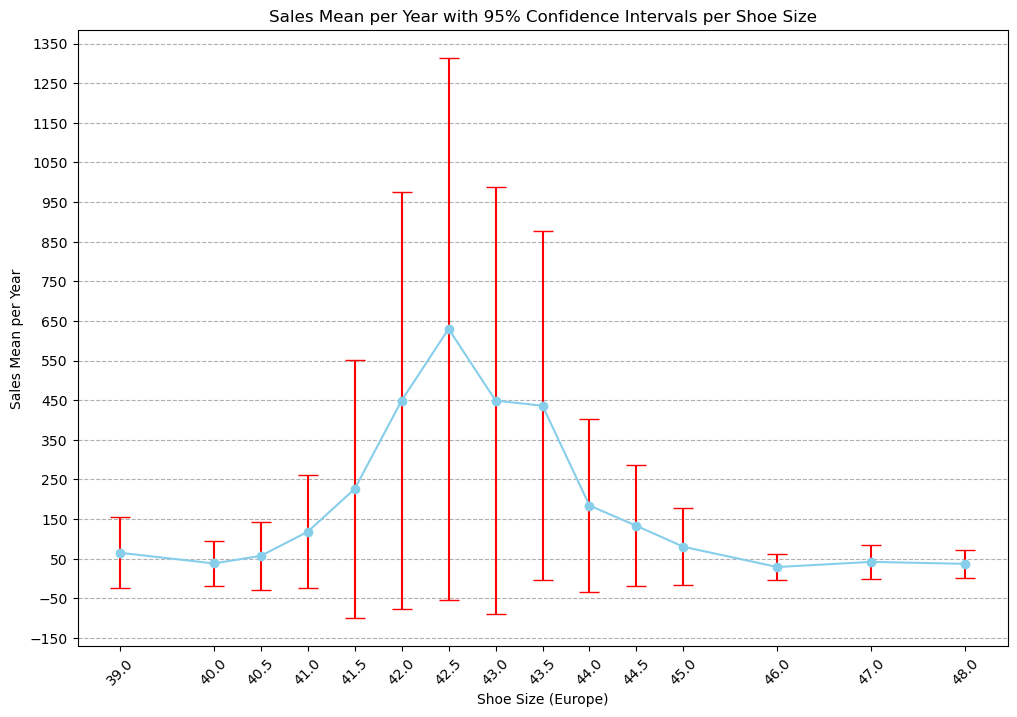

In [19]:
# Create the figure:
plt.figure(figsize=(12, 8))

# Create an errorbar of sizes VS sales mean with errorbars displayed in the y-direction:
plt.errorbar(sizes, means, yerr=mrg_error, fmt="o-", capsize=7, color="skyblue", ecolor="red")

# Name axis and figure:
plt.xlabel("Shoe Size (Europe)")
plt.ylabel("Sales Mean per Year")
plt.title("Sales Mean per Year with 95% Confidence Intervals per Shoe Size")

# Set the tickers and create a grid:
plt.xticks(sizes, rotation=45)
plt.yticks(np.arange(-150, 1400, 100))
plt.grid(axis="y", linestyle="--");

##### Conclusions
<div style="text-align: justify">
The results indicate that trying to predict next year's sales to control inventory management is challenging due to huge variability of the data. The wide confidence intervals suggests that sales could vary significantly making precise predictions difficult. Therefore, we 'll try another approach increasing the sample size in order to reduce the margin of error and provide more accurate estimates. 

### Confidence Intervals for 3-month Sales Prediction for Males

##### Key Considerations
There is one population with an unknown variance and normality can be assumed.

##### Calculation of Mean and Standard Deviation per Shoe Size Combining all Quarters

In [20]:
# Create a df from the shoe size value_counts series:
male_sales_per_quarter = (
    df_quarter_male.groupby(["Date (quarter)", "Size (Europe)"]).size().reset_index(name="Sales")
)

# male_sales_per_quarter should produce 180 results (15 shoe sizes * 4 quarters * 3 years).
# However, there wasn't any sale of 46 shoe size during the first quarter of 2014 (1-2014).
# Create the missing observation:
missing_observation = pd.DataFrame([{"Date (quarter)": "1-2014", "Size (Europe)": 46.0, "Sales": 0}])

# Append the missing observation to the df:
male_sales_per_quarter = pd.concat([male_sales_per_quarter, missing_observation], ignore_index=True)

# Sort by "Date (quarter)" and "Size (Europe)" to maintain order:
male_sales_per_quarter = (
    male_sales_per_quarter.sort_values(["Date (quarter)", "Size (Europe)"]).reset_index(drop=True)
)

# Calculate the mean and the std per shoe size combining all three years:
combined_sales_per_quarter = (
    male_sales_per_quarter.groupby("Size (Europe)")["Sales"].agg(["mean", "std"]).reset_index()
)

# Set a clearer column names:
combined_sales_per_quarter.columns = ["Size (Europe)", "Sales Mean", "Sales Standard Deviation"]

In [21]:
# Assign some columns in variables, gaining space afterwards:
sizes = combined_sales_per_quarter["Size (Europe)"]
means = combined_sales_per_quarter["Sales Mean"]
std = combined_sales_per_quarter["Sales Standard Deviation"]

##### Calculation of Standard Error for each Shoe Size

In [22]:
# Assign the sample size, n to a variable:
n = 12

# Add a new column containing sample size, n, per shoe size:
combined_sales_per_quarter["n"] = n

# Add a new column containing the standard error, SE, per shoe size:
combined_sales_per_quarter["Standard Error"] = std / (combined_sales_per_quarter["n"]**0.5)

print(combined_sales_per_quarter)

    Size (Europe)  Sales Mean  Sales Standard Deviation   n  Standard Error
0            39.0       16.25                  9.176303  12        2.648971
1            40.0        9.50                  6.473723  12        1.868803
2            40.5       14.25                  8.915003  12        2.573540
3            41.0       29.50                 13.125271  12        3.788939
4            41.5       56.50                 29.870934  12        8.622996
5            42.0      112.25                 52.300052  12       15.097725
6            42.5      157.50                 62.395367  12       18.011991
7            43.0      112.25                 48.915744  12       14.120759
8            43.5      109.00                 41.490415  12       11.977251
9            44.0       46.00                 20.068066  12        5.793152
10           44.5       33.25                 14.585952  12        4.210602
11           45.0       20.00                 12.438942  12        3.590813
12          

In [23]:
# Assign some columns in variables, gaining space afterwards:
st_error = combined_sales_per_quarter["Standard Error"]

##### Calculation of t-statistic
<div style="text-align: justify">
Assuming we want to be 95% confident the next quarter's sales per shoe size will fall inside our confident interval range, the confident level is $1-α=0.95$, and hence $α=0.05$. The degrees of freedom, $n-1$ equals $12-1=11$, $df=11$. Therefore, we are looking for $t_{11, 0.025}$. From t-distribution table critical values table we can see that $t_{11, 0.025}=2.201$.

In [24]:
# Assign the t-statistic value to a variable:
t_statistic = 2.201

# Create a new column with the margin of error:
combined_sales_per_quarter["Margin of Error"] = t_statistic * st_error

In [25]:
# Assign some columns in variables, gaining space afterwards:
mrg_error = combined_sales_per_quarter["Margin of Error"]

##### Calculation of Confidence Intervals

In [26]:
# Create a new column containing the lower confidence interval for each shoe size:
combined_sales_per_quarter["Lower CI"] = means - mrg_error

# Create a new column containing the upper confidence interval for each shoe size:
combined_sales_per_quarter["Upper CI"] = means + mrg_error

combined_sales_per_quarter

,Size (Europe),Sales Mean,Sales Standard Deviation,n,Standard Error,Margin of Error,Lower CI,Upper CI
0,39.0,16.25,9.176303,12,2.648971,5.830384,10.419616,22.080384
1,40.0,9.50,6.473723,12,1.868803,4.113235,5.386765,13.613235
2,40.5,14.25,8.915003,12,2.573540,5.664361,8.585639,19.914361
3,41.0,29.50,13.125271,12,3.788939,8.339455,21.160545,37.839455
4,41.5,56.50,29.870934,12,8.622996,18.979214,37.520786,75.479214
5,42.0,112.25,52.300052,12,15.097725,33.230092,79.019908,145.480092
6,42.5,157.50,62.395367,12,18.011991,39.644392,117.855608,197.144392
7,43.0,112.25,48.915744,12,14.120759,31.079790,81.170210,143.329790
8,43.5,109.00,41.490415,12,11.977251,26.361930,82.638070,135.361930
9,44.0,46.00,20.068066,12,5.793152,12.750727,33.249273,58.750727


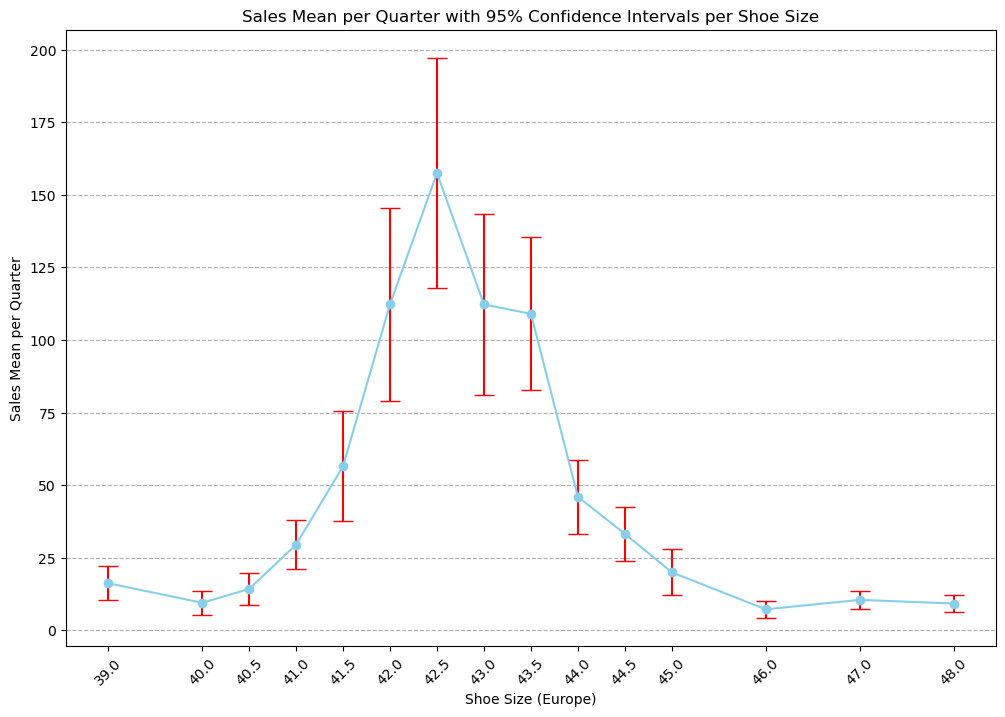

In [27]:
# Create the figure:
plt.figure(figsize=(12, 8))

# Create an errorbar of sizes VS sales mean with errorbars displayed in the y-direction:
plt.errorbar(sizes, means, yerr=mrg_error, fmt="o-", capsize=7, color="skyblue", ecolor="red")

# Name axis and figure:
plt.xlabel("Shoe Size (Europe)")
plt.ylabel("Sales Mean per Quarter")
plt.title("Sales Mean per Quarter with 95% Confidence Intervals per Shoe Size")

# Set the tickers and create a grid:
plt.xticks(sizes, rotation=45)
plt.yticks(np.arange(0, 225, 25))
plt.grid(axis="y", linestyle="--");

##### Conclusions
<div style="text-align: justify">
The CIs for the quarterly data are narrower compared to the yearly data. This suggests that the increased sample size, $n=12$, has successfully reduced the margin of error, resulting in more precise estimates. However, some shoe sizes, such as 42 and 42.5 still exhibit a relatively high margin of error indicating higher variability in sales for these sizes even for a quarterly prediction. The margin of error for most sizes are small, showing that these specific estimates are more reliable. For instance, size 46 has a lower CI of 4.29 and an upper CI of 10.21, which is a very good improvement over the previous yearly examination.

### Confidence Intervals for 1-month Sales Prediction for Males Using t-statistic

##### Key Considerations
There is one population with an unknown variance and normality can be assumed.

##### Calculation of Mean and Standard Deviation per Shoe Size Combining all Months
<div style="text-align: justify">
We won't present the whole code in one cell because data modifications are necessary for this approach. Specifically, the df below ("males_sales_per_month") should yield 540 results (15 shoe sizes * 12 months * 3 years). However, there are only 514 results, meaning there are zero sales of specific sizes at certain months. These zero sales are treated as missing values by Pandas. Therefore, we have to address this issue before proceeding further.

In [28]:
# Create a df from the shoe size value_counts series:
male_sales_per_month = (
    df_month_male.groupby(["Date (month)", "Size (Europe)"])
    .size()
    .reset_index(name="Sales")
)

print(len(male_sales_per_month))

514


<div style="text-align: justify">
One solution to this problem is to create a pivot table df, setting "Date (month)" as an index, the value_counts of "Size (Europe)" as columns, "Sales" as the df values, and finally filling the missing values with zeros.

In [29]:
# Create the pivot table as described above filling the missing values with zeros:
dummy_table = (
    male_sales_per_month.pivot_table(
        index="Date (month)", columns="Size (Europe)", values="Sales", fill_value=0
    )
)

In [30]:
# Reset index to make "Date (month)" a column again:
male_sales_per_month = dummy_table.reset_index()

<div style="text-align: justify">
To revert the pivot process, we 'll apply the melt() method to unpivot the df and making it as it originally was. The variable which should be converted is "Size (Europe)" while we need to add all "Sales" values under the "Size (Europe)" columns and display the result into a single column. Additionally, "Date (month)" should play the role of the identifier column.

In [31]:
# Unpivot the df converting columns into rows:
male_sales_per_month = (
    male_sales_per_month.melt(
        id_vars="Date (month)", var_name="Size (Europe)", value_name="Sales"
    )
)

In [32]:
# Sort the DataFrame by month and shoe size and fix the index:
male_sales_per_month = (
    male_sales_per_month.sort_values(
        by=["Date (month)", "Size (Europe)"]
    )
    .reset_index(drop=True)
)

<div style="text-align: justify">
At this point, the result is exactly the same with the original one, having the missing values filled with zeros (540 observations). We can now proceed calculating the mean and the standard deviation.

In [33]:
print(len(male_sales_per_month))

540


In [34]:
# Calculate the mean and the std per shoe size combining all three years:
combined_sales_per_month = (
    male_sales_per_month.groupby("Size (Europe)")["Sales"]
    .agg(["mean", "std"])
    .reset_index()
)

# Set a clearer column names:
combined_sales_per_month.columns = ["Size (Europe)", "Sales Mean", "Sales Standard Deviation"]

In [35]:
# Assign some columns to variables, gaining space afterwards:
sizes = combined_sales_per_month["Size (Europe)"]
means = combined_sales_per_month["Sales Mean"]
std = combined_sales_per_month["Sales Standard Deviation"]

##### Calculation of Standard Error for each Shoe Size

In [36]:
# Assign the sample size, n to a variable:
n = 36

# Add a new column containing sample size, n, per shoe size:
combined_sales_per_month["n"] = n

# Add a new column containing the standard error, SE, per shoe size:
combined_sales_per_month["Standard Error"] = std / (combined_sales_per_month["n"]**0.5)

print(combined_sales_per_month)

    Size (Europe)  Sales Mean  Sales Standard Deviation   n  Standard Error
0            39.0    5.416667                  4.338367  36        0.723061
1            40.0    3.166667                  2.823372  36        0.470562
2            40.5    4.750000                  4.080441  36        0.680074
3            41.0    9.833333                  5.212622  36        0.868770
4            41.5   18.833333                 10.691786  36        1.781964
5            42.0   37.416667                 19.079346  36        3.179891
6            42.5   52.500000                 21.674870  36        3.612478
7            43.0   37.416667                 16.737255  36        2.789543
8            43.5   36.333333                 14.595498  36        2.432583
9            44.0   15.333333                  7.445037  36        1.240839
10           44.5   11.083333                  6.353289  36        1.058882
11           45.0    6.666667                  5.002856  36        0.833809
12          

In [37]:
# Assign some columns in variables, gaining space afterwards:
st_error = combined_sales_per_month["Standard Error"]

##### Calculation of t-statistic
<div style="text-align: justify">
The sample size, $n$, equals $36$ which is greater than $30$. This implies that the standard deviations derived from these observations may effectively represent the population's standard deviations. While either the z-statistic or the t-statistic choice could yield similar results we 'll choose the t-statistic.

<div style="text-align: justify">
Assuming we want to be 95% confident the next month's sales per shoe size will fall inside our confident interval range, the confident level is $1-α=0.95$, and hence $α=0.05$. The degrees of freedom, $n-1$ equals $36-1=35$, $df=35$. Therefore, we are looking for $t_{35, 0.025}$. From t-distribution table critical values table we can see that $t_{35, 0.025}=2.03$, while the corresponding z-statistic value is $1.96$.

In [38]:
# Assign the t-statistic value to a variable:
t_statistic = 2.03

# Create a new column with the margin of error:
combined_sales_per_month["Margin of Error"] = t_statistic * st_error

In [39]:
# Assign some columns in variables, gaining space afterwards:
mrg_error = combined_sales_per_month["Margin of Error"]

##### Calculation of Confidence Intervals

In [40]:
# Create a new column containing the lower confidence interval for each shoe size:
combined_sales_per_month["Lower CI"] = means - mrg_error

# Create a new column containing the upper confidence interval for each shoe size:
combined_sales_per_month["Upper CI"] = means + mrg_error

combined_sales_per_month

,Size (Europe),Sales Mean,Sales Standard Deviation,n,Standard Error,Margin of Error,Lower CI,Upper CI
0,39.0,5.416667,4.338367,36,0.723061,1.467814,3.948852,6.884481
1,40.0,3.166667,2.823372,36,0.470562,0.955241,2.211426,4.121907
2,40.5,4.750000,4.080441,36,0.680074,1.380549,3.369451,6.130549
3,41.0,9.833333,5.212622,36,0.868770,1.763604,8.069730,11.596937
4,41.5,18.833333,10.691786,36,1.781964,3.617388,15.215946,22.450721
5,42.0,37.416667,19.079346,36,3.179891,6.455179,30.961488,43.871845
6,42.5,52.500000,21.674870,36,3.612478,7.333331,45.166669,59.833331
7,43.0,37.416667,16.737255,36,2.789543,5.662771,31.753895,43.079438
8,43.5,36.333333,14.595498,36,2.432583,4.938144,31.395190,41.271477
9,44.0,15.333333,7.445037,36,1.240839,2.518904,12.814429,17.852237


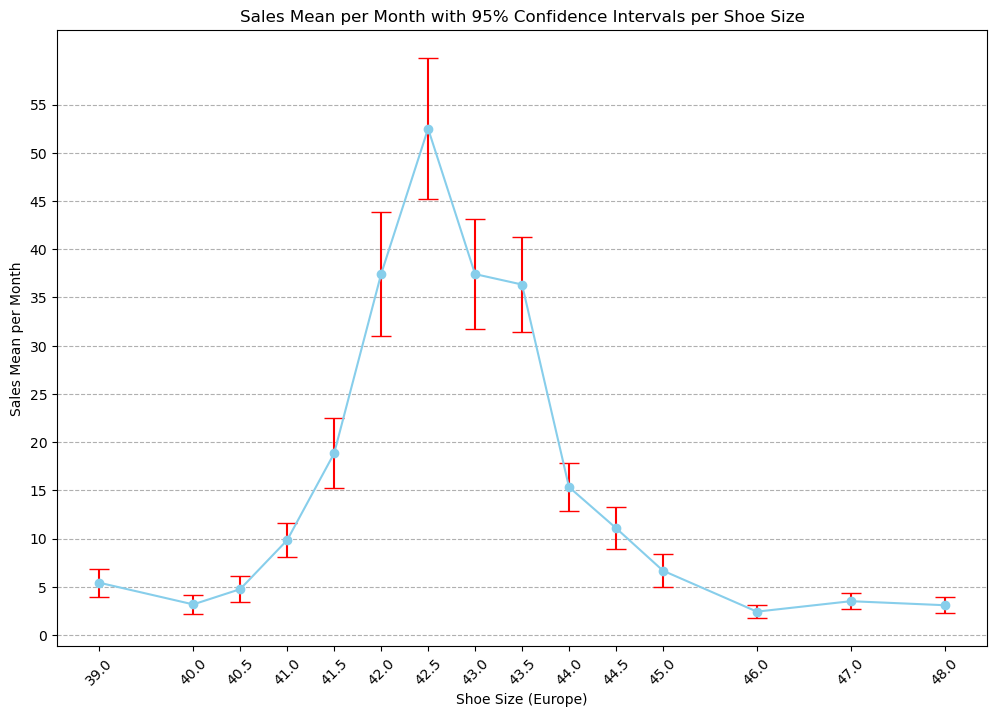

In [41]:
# Create the figure:
plt.figure(figsize=(12, 8))

# Create an errorbar of sizes VS sales mean with errorbars displayed in the y-direction:
plt.errorbar(sizes, means, yerr=mrg_error, fmt="o-", capsize=7, color="skyblue", ecolor="red")

# Name axis and figure:
plt.xlabel("Shoe Size (Europe)")
plt.ylabel("Sales Mean per Month")
plt.title("Sales Mean per Month with 95% Confidence Intervals per Shoe Size")

# Set the tickers and create a grid:
plt.xticks(sizes, rotation=45)
plt.yticks(np.arange(0, 60, 5))
plt.grid(axis="y", linestyle="--");

##### Conclusions
<div style="text-align: justify">
Compared to the yearly and quarterly data, the monthly data shows significantly narrower confidence intervals. This indicates a higher precision in estimating the next month's sales for each shoe size. The increased sample size (n = 36) has effectively reduced the margin of error, leading to more reliable estimates. For example, size 42.5 has a lower CI of 45.17 and an upper CI of 59.83, which is much narrower compared to previous intervals.

### Confidence Intervals for 1-month Sales Prediction for Males Using z-statistic
Assuming the sample size is sufficiently large to accurate give the true standard deviations, then $σ=s$. Based on this assumption, the process of calculating the CIs using the z-statistic should be similar to the corresponding one, using the t-statistic. Let's examine the results.

In [42]:
# Assign the z-statistic value to a variable:
z_statistic = 1.96

# Create a new column with the margin of error:
combined_sales_per_month["Margin of Error (z-stat)"] = z_statistic * st_error

In [43]:
# Assign some columns in variables, gaining space afterwards:
mrg_error = combined_sales_per_month["Margin of Error (z-stat)"]

In [44]:
# Create a new column containing the lower confidence interval for each shoe size:
combined_sales_per_month["Lower CI (z-stat)"] = means - mrg_error

# Create a new column containing the upper confidence interval for each shoe size:
combined_sales_per_month["Upper CI (z-stat)"] = means + mrg_error

combined_sales_per_month

,Size (Europe),Sales Mean,Sales Standard Deviation,n,Standard Error,Margin of Error,Lower CI,Upper CI,Margin of Error (z-stat),Lower CI (z-stat),Upper CI (z-stat)
0,39.0,5.416667,4.338367,36,0.723061,1.467814,3.948852,6.884481,1.417200,3.999467,6.833867
1,40.0,3.166667,2.823372,36,0.470562,0.955241,2.211426,4.121907,0.922301,2.244365,4.088968
2,40.5,4.750000,4.080441,36,0.680074,1.380549,3.369451,6.130549,1.332944,3.417056,6.082944
3,41.0,9.833333,5.212622,36,0.868770,1.763604,8.069730,11.596937,1.702790,8.130543,11.536123
4,41.5,18.833333,10.691786,36,1.781964,3.617388,15.215946,22.450721,3.492650,15.340683,22.325983
5,42.0,37.416667,19.079346,36,3.179891,6.455179,30.961488,43.871845,6.232586,31.184080,43.649253
6,42.5,52.500000,21.674870,36,3.612478,7.333331,45.166669,59.833331,7.080458,45.419542,59.580458
7,43.0,37.416667,16.737255,36,2.789543,5.662771,31.753895,43.079438,5.467503,31.949163,42.884170
8,43.5,36.333333,14.595498,36,2.432583,4.938144,31.395190,41.271477,4.767863,31.565471,41.101196
9,44.0,15.333333,7.445037,36,1.240839,2.518904,12.814429,17.852237,2.432045,12.901288,17.765379


##### Conclusions for Monthly Sales Using the z-statistic
<div style="text-align: justify">
The obtained results are almost equal to those derived from the t-statistic approach, as anticipated. While both methods yield very similar results, we 'll avoide making the additional assumption required for applying z-statistic, and hence we 'll pick t-statistic approach.

## Inventory Management Conclusions
<div style="text-align: justify">
Pretending I am the manager of Al Bundy's owing this exact dataset, my primary focus would be the monthly sales data. However, taking into account only the monthly data has a risk of information overload. For example, having some customers who buy exceptionally large stocks only once or twice per year might lead to inventory management problems during those months. Therefore, it would be crucial to "see" less information adopting a quarterly or 6-month approach in order to better "catch" these large stocks trends. Nevertheless, assuming that there are limitations over the purchase of excessively large quantities of shoes, the monthly sales data are a good option for effective inventory management. The upper limits of monthly sales confidence intervals serve as reliable production targets, ensuring the store maintains enough stock levels and minimizes the risk of losing a sale due to zero inventory of specific shoe models.